In [8]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from pprint import pprint
from scipy import stats
import numpy as np

# Dependencies (local modules)
from countries import get_country

In [9]:
# Import CSV to DataFrames
csv_airquality = Path("Cleaned_Datasets/cleaned_airquality.csv")
csv_life_expectancy = Path("Cleaned_Datasets/cleaned_life_expectancy_data.csv")

airquality_df = pd.read_csv(csv_airquality)
life_expectancy_df = pd.read_csv(csv_life_expectancy)

In [10]:
# Air quality data uses country code instead of country name

# Iterate through the DataFrame
for index, row in airquality_df.iterrows():
    # Replace the country code by the country name
    airquality_df.loc[index,'Country'] = get_country(airquality_df.loc[index,'Country'])

# List all the countries in the air quality DataFrame
airquality_countries = airquality_df['Country'].unique().tolist()
print(f"{len(airquality_countries)} countries found.")
pprint(airquality_countries)

93 countries found.
['United Arab Emirates',
 'Afghanistan',
 'Argentina',
 'Austria',
 'Australia',
 'Bosnia and Herzegovina',
 'Bangladesh',
 'Belgium',
 'Bulgaria',
 'Bahrain',
 'Brazil',
 'Canada',
 'Switzerland',
 "Cote d'Ivoire",
 'Chile',
 'China',
 'Colombia',
 'Costa Rica',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Germany',
 'Denmark',
 'Algeria',
 'Ecuador',
 'Estonia',
 'Spain',
 'Ethiopia',
 'Finland',
 'France',
 'United Kingdom of Great Britain and Northern Ireland',
 'Georgia',
 'Ghana',
 'Guinea',
 'Greece',
 'Guatemala',
 'Hong Kong',
 'Croatia',
 'Hungary',
 'Indonesia',
 'Ireland',
 'Israel',
 'India',
 'Iraq',
 'Iran (Islamic Republic of)',
 'Iceland',
 'Italy',
 'Jordan',
 'Japan',
 'Kyrgyzstan',
 'Republic of Korea',
 'Kuwait',
 'Kazakhstan',
 "Lao People's Democratic Republic",
 'Sri Lanka',
 'Lithuania',
 'North Macedonia',
 'Mali',
 'Myanmar',
 'Mongolia',
 'Macao',
 'Mexico',
 'The Netherlands',
 'Norway',
 'Nepal',
 'New Zealand',
 'Peru',
 'Philippines',
 'Pakis

In [11]:
#Display air quality dataframe
airquality_df.head()

,Country,Year,PM25
0,United Arab Emirates,2015,118.714286
1,United Arab Emirates,2016,92.000000
2,United Arab Emirates,2018,122.683432
3,United Arab Emirates,2019,111.881940
4,United Arab Emirates,2020,82.900973


In [12]:
#Display life expectancy dataframe
life_expectancy_df.head()

,Country,Year,Life Expectancy
0,Afghanistan,2015,62.66
1,Afghanistan,2016,63.14
2,Afghanistan,2017,63.02
3,Afghanistan,2018,63.08
4,Afghanistan,2019,63.56


In [13]:
# Merge the 2 DataFrames and keep the same country name
air_life_analysis_df = pd.merge(airquality_df, life_expectancy_df, on=["Country", "Year"], how="inner")
air_life_analysis_df

,Country,Year,PM25,Life Expectancy
0,United Arab Emirates,2015,118.714286,79.22
1,United Arab Emirates,2016,92.000000,79.33
2,United Arab Emirates,2018,122.683432,79.63
3,United Arab Emirates,2019,111.881940,79.73
4,United Arab Emirates,2020,82.900973,78.95
...,...,...,...,...
334,Kosovo,2018,70.028409,78.70
335,Kosovo,2019,66.963501,79.02
336,Kosovo,2020,69.630102,76.57
337,South Africa,2019,55.939217,66.18


In [14]:
#Top 10 countries with the best air quality (based on PM25)
analysis_sorted_by_PM25 = air_life_analysis_df.sort_values('PM25', ascending=True)
analysis_sorted_by_PM25[['Country','Year','PM25']].head(10)

,Country,Year,PM25
44,Bulgaria,2020,2.000000
65,Switzerland,2020,2.151115
64,Switzerland,2019,2.242184
63,Switzerland,2018,2.414773
61,Switzerland,2016,2.451613
62,Switzerland,2017,3.397959
188,Iceland,2018,15.598901
189,Iceland,2019,16.100292
297,Sweden,2015,16.987805
122,Estonia,2020,17.924426


In [15]:
#Top 10 countries with the highest life expectancy
life_expectancy_Analysis = air_life_analysis_df.sort_values('Life Expectancy', ascending=False)
life_expectancy_Analysis[['Country','Year','Life Expectancy']].head(10)

,Country,Year,Life Expectancy
202,Japan,2020,84.56
308,Singapore,2020,84.47
201,Japan,2019,84.36
200,Japan,2018,84.21
199,Japan,2017,84.10
198,Japan,2016,83.98
64,Switzerland,2019,83.90
127,Spain,2019,83.83
197,Japan,2015,83.79
63,Switzerland,2018,83.75


In [16]:
#Bottom 10 countries with the lowest air quality (based on PM25)
analysis_sorted_by_PM25 = air_life_analysis_df.sort_values('PM25', ascending=False)
analysis_sorted_by_PM25[['Country','Year','PM25']].head(10)

,Country,Year,PM25
5,Afghanistan,2019,187.457627
30,Bangladesh,2018,159.808989
29,Bangladesh,2017,157.497326
224,Mali,2019,153.750000
179,India,2016,147.939673
180,India,2017,143.679880
46,Bahrain,2018,142.812865
31,Bangladesh,2019,142.792493
181,India,2018,139.787106
32,Bangladesh,2020,139.460557


In [17]:
#Bottom 10 countries with the lowest life expectancy
life_expectancy_Analysis = air_life_analysis_df.sort_values('Life Expectancy', ascending=True)
life_expectancy_Analysis[['Country','Year','Life Expectancy']].head(10)

,Country,Year,Life Expectancy
225,Mali,2020,58.63
66,Cote d'Ivoire,2020,59.03
148,Guinea,2020,59.33
224,Mali,2019,59.66
326,Uganda,2017,62.12
6,Afghanistan,2020,62.58
327,Uganda,2018,62.71
329,Uganda,2020,62.85
328,Uganda,2019,62.99
5,Afghanistan,2019,63.56


R-value: -0.58
Linear model: [Life Expectancy] = -0.0934 * [PM25] + 82.98


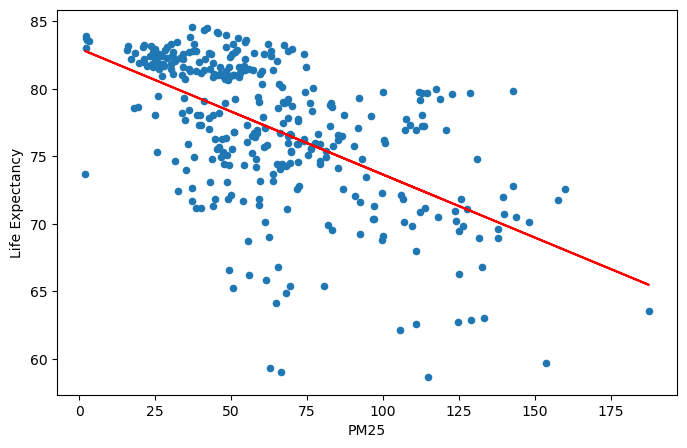

In [18]:
#Correlation between PM25 concentration and Life Expectancy.
#Show a scatter plot of PM25 versus Life Expectancy prevalence for all countries and all years.
air_life_analysis_df.plot.scatter(x='PM25',y='Life Expectancy', figsize=(8,5))

# Create a linear regression model based on the PM25 and Life Expectancy
x_data = air_life_analysis_df['PM25']
y_data = air_life_analysis_df['Life Expectancy']
[slope, intercept, rvalue, pvalue, stdeve] = stats.linregress(x_data,y_data)
print(f"R-value: {rvalue:.2f}")
print(f"Linear model: [Life Expectancy] = {slope:.4f} * [PM25] + {intercept:.2f}")

y_reg = slope*x_data+intercept
plt.plot(x_data,y_reg,'r')

#save file to folder
plt.savefig('Images/PM25_and_Life_Expectancy.png')

# Show plot
plt.show()

Relationship result between life expectancy data and Air Quality shows in the scatter plot graph above.
This realtionship shows a negative correlation between air quality (PM25) and Life Expectancy - read the graph from left ot right where you can find a decreasing trend.
The higher the PM25 (poorer air quality) the lower the life expetancy, so there is an inverse relationship between air quality and life expectancy but it doesn't mean causation means air quality doesnt necessary causing people to life longer.
This graph shows a none / weak negative relationship means that the data points spread out but still making a trend.
Countries with lower PM25 (good air quality) seems to have longer life expetancy, however futher analysis needs to be done as this is not the only reason for the longer life expectancy, other factors may have significant effect such as Genetics, Life Style, Exercise, Diet, Social Life, etc.

In [19]:
#Changes of air quality and asthma over the years
year_list = air_life_analysis_df['Year'].unique().tolist()
year_list.sort()

year_list

[2015, 2016, 2017, 2018, 2019, 2020]

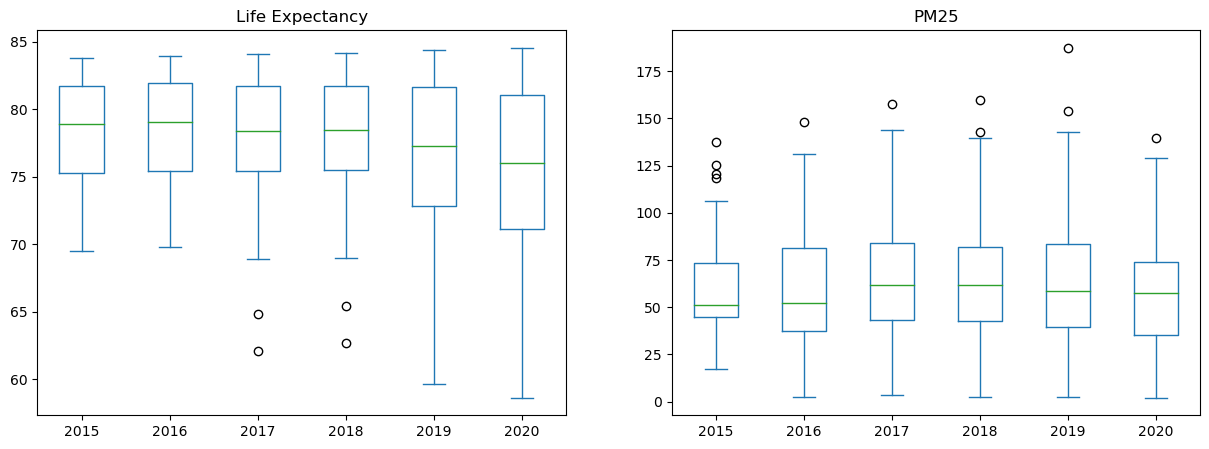

In [20]:
#Box plot graphs
air_life_analysis_df.plot.box('Year',column=['PM25','Life Expectancy'],figsize=(15,5))
plt.show()

On the Life Expectancy box plot you can see that between 2015 - 2018 we have similar sample size and the median age around 78-79 however in 2019-2020 there is a decline in the median age to 76-77 period where this has caused a reduction of the median age and you can see also a couple of outlier in each of 2017 & 2018 dataset.
For PM25 box plot shows a steady around 50-62 micrograms between 2015-2020 a slight decrease in the country analysed in 2019-2020 and from this you can see several outlier in each of the year.

In [21]:
#Groupby country
grouped_df = air_life_analysis_df.groupby("Country")[["PM25", "Life Expectancy"]].mean()
grouped_df

,PM25,Life Expectancy
Country,,
Afghanistan,149.088022,63.070000
Algeria,66.867084,75.460000
Argentina,42.697000,76.662000
Australia,25.416483,82.700000
Austria,48.389612,81.541667
...,...,...
Turkmenistan,59.081725,68.845000
Uganda,123.080540,62.667500
Ukraine,41.535770,71.510000


In [22]:
#Groupby Air Cateogry by the mean
grouped_df.loc[grouped_df['PM25'].between(0, 12), "Air Category"]='Good'
grouped_df.loc[grouped_df['PM25'].between(12.1, 35.4), "Air Category"]='Moderate'
grouped_df.loc[grouped_df['PM25'].between(35.5, 55.4), "Air Category"]='Unhealty for SG'
grouped_df.loc[grouped_df['PM25'].between(55.5, 150.4), "Air Category"]='Unhealthy'
grouped_df.loc[grouped_df['PM25'].between(150.5, 250.4), "Air Category"]='Very Unhealthy'
grouped_df.loc[grouped_df['PM25'].between(250.5, 500), "Air Category"]='Hazardous'

#show DataFrame
grouped_df

,PM25,Life Expectancy,Air Category
Country,,,
Afghanistan,149.088022,63.070000,Unhealthy
Algeria,66.867084,75.460000,Unhealthy
Argentina,42.697000,76.662000,Unhealty for SG
Australia,25.416483,82.700000,Moderate
Austria,48.389612,81.541667,Unhealty for SG
...,...,...,...
Turkmenistan,59.081725,68.845000,Unhealthy
Uganda,123.080540,62.667500,Unhealthy
Ukraine,41.535770,71.510000,Unhealty for SG


In [23]:
# Count the occurrences of each category
grouped_counts_df = grouped_df["Air Category"].value_counts()
grouped_counts_df

Unhealthy          46
Unhealty for SG    18
Moderate           12
Good                1
Name: Air Category, dtype: int64

In [24]:
# Calculating mean on groupby
mean_life_expectancy = grouped_df.groupby('Air Category')['Life Expectancy'].mean()
mean_life_expectancy

Air Category
Good               83.560000
Moderate           81.738444
Unhealthy          73.046877
Unhealty for SG    77.077204
Name: Life Expectancy, dtype: float64

In [25]:
# Creating a DataFrame from the mean values
mean_df = pd.DataFrame({'Air Category': mean_life_expectancy.index, 'Life Expectancy': mean_life_expectancy.values})
mean_df

,Air Category,Life Expectancy
0,Good,83.560000
1,Moderate,81.738444
2,Unhealthy,73.046877
3,Unhealty for SG,77.077204


In [26]:
#sort by the highest Life Expectancy
mean_df_sorted = mean_df.sort_values(by='Life Expectancy', ascending=False)
mean_df_sorted

,Air Category,Life Expectancy
0,Good,83.560000
1,Moderate,81.738444
3,Unhealty for SG,77.077204
2,Unhealthy,73.046877


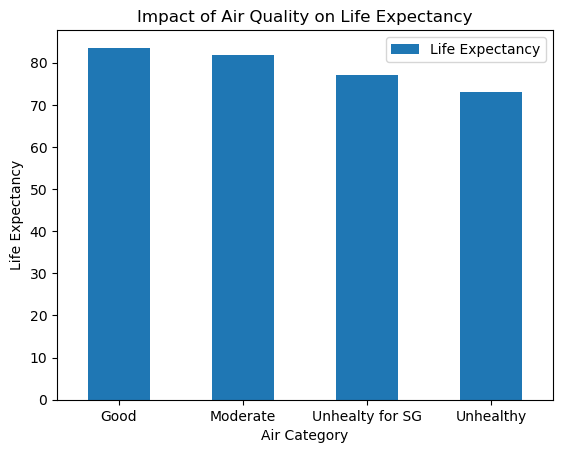

In [34]:
# Plot the bar chart
mean_df_sorted.plot(x='Air Category', y='Life Expectancy', kind='bar')
plt.xlabel('Air Category')
plt.ylabel('Life Expectancy')
plt.title('Impact of Air Quality on Life Expectancy')

# Rotate x-axis labels on a 45-degree angle
plt.xticks(rotation=0)

plt.savefig('Images/Bar_Chart_Air_Category_Life_Expectancy.png')
plt.show()

By calculating categorising the air quality based on the level of PM25 and finding the mean of the Life Expectancy and put it on a bar chart we can see that the good and moderate air quality have higher Life Expectancy than the unhealthy groups.

Note: SG stands for Sensitive Group

In [35]:
#Sort by the highest air quality (lowest PM25)
sort_highest_air_quality = grouped_df.sort_values('PM25')
sort_highest_air_quality

,PM25,Life Expectancy
Country,,
Switzerland,2.531529,83.560000
Iceland,18.483935,82.788000
Estonia,24.018926,78.395000
Finland,24.840073,81.696667
Australia,25.416483,82.700000
...,...,...
Pakistan,128.824845,66.515000
India,133.250103,70.333333
Mali,134.224031,59.145000


In [36]:
#Sort by the lowest air quality (highest PM25)
sort_lowest_air_quality = grouped_df.sort_values('PM25', ascending=False)
sort_lowest_air_quality

,PM25,Life Expectancy
Country,,
Afghanistan,149.088022,63.070000
Bangladesh,145.420348,72.046000
Mali,134.224031,59.145000
India,133.250103,70.333333
Pakistan,128.824845,66.515000
...,...,...
Australia,25.416483,82.700000
Finland,24.840073,81.696667
Estonia,24.018926,78.395000


In [37]:
#Comparing between 2 countries Switzerland and Indonesia with different level of PM25 and life expectancy.
#Get the mean for target country Switzerland
grouped_df = air_life_analysis_df.groupby("Country")[["PM25", "Life Expectancy"]].mean()
australia_data = grouped_df.loc["Switzerland"]
australia_data

PM25                2.531529
Life Expectancy    83.560000
Name: Switzerland, dtype: float64

In [38]:
#Get the mean for target country Indonesia
indonesia_data = grouped_df.loc["Indonesia"]
indonesia_data

PM25               101.215552
Life Expectancy     69.882000
Name: Indonesia, dtype: float64

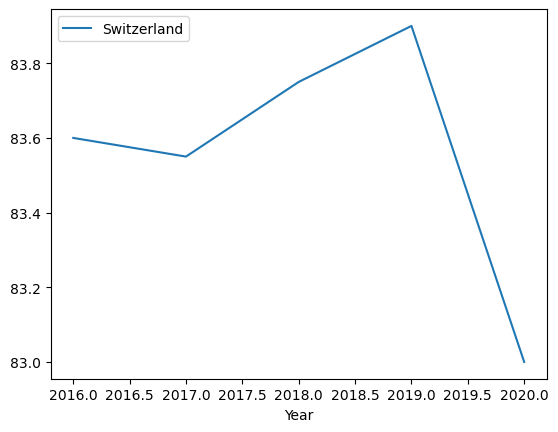

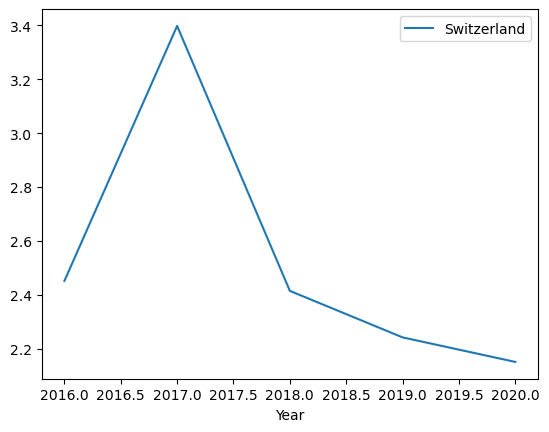

In [39]:
#Line Graph for Switzerland
country = 'Switzerland'
country_df_swiss = air_life_analysis_df.loc[air_life_analysis_df['Country']==country,:]

country_df_swiss.plot.line('Year','Life Expectancy',label=country)
plt.savefig('Images/Year_and_Life_Expectancy_Switzerland.png')

country_df_swiss.plot.line('Year','PM25',label=country)
plt.savefig('Images/Year_and_PM25_Switzerland.png')

plt.show()

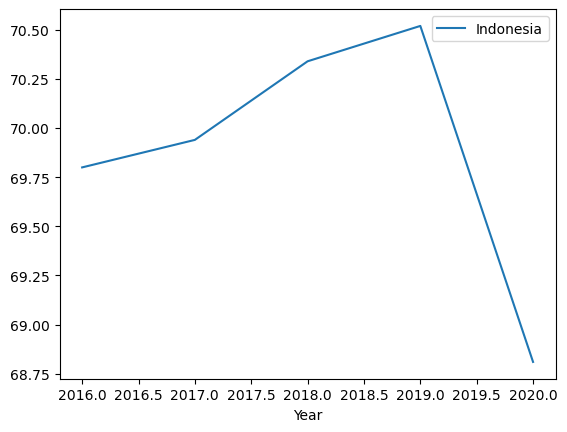

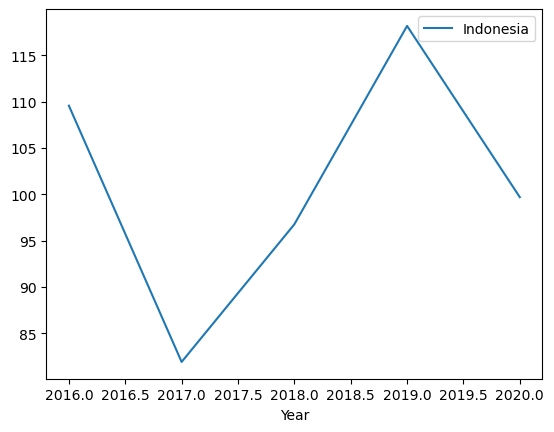

In [40]:
#Line Graph for Indonesia
country = 'Indonesia'
country_df_Indonesia = air_life_analysis_df.loc[air_life_analysis_df['Country']==country,:]

country_df_Indonesia.plot.line('Year','Life Expectancy',label=country)
plt.savefig('Images/Year_and_Life_Expectancy_Indonesia.png')

country_df_Indonesia.plot.line('Year','PM25',label=country)
plt.savefig('Images/Year_and_PM25_Indonesia.png')

plt.show()

Switzerland shows that the life expectancy is increasing every year and this inline with PM25 shows a decrease between 2016-2019. On the other hand Indonesia shows the life expectancy decreasing in 2016-2020 and this show an increase in PM25 in 2016-2019.

CONCLUSION

We can see from the above analysis and graphs that countries with good and moderate categories which has low level of PM25 live much longer than countries with higher PM25. 

This can be conclued that air quality has an impact in life expectancy however this does not mean that air quality is the only factor or the main driver of life expectancy. Life Expectancy could be drivered from a range of factor, including but not limited to Genetics, Life Style such as excercise, Diet or food you eat, Social Life and many other things. This analysis is only to show that air quality (level of PM25) has some correlation to the life expectancy in countries around the world.